<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_matrix_vector_products(matrices, vectors):
   
    if len(matrices) != len(vectors):
        raise ValueError("Количество матриц и векторов должно совпадать.")
    
    total = np.zeros_like(vectors[0])
    
    for A, v in zip(matrices, vectors):
        total += A @ v  # матричное умножение
    
    return total

def test_sum_matrix_vector_products():
    A1 = np.array([[1, 0], [0, 1]])
    A2 = np.array([[2, 1], [1, 2]])
    v1 = np.array([[1], [1]])
    v2 = np.array([[1], [0]])

    result = sum_matrix_vector_products([A1, A2], [v1, v2])
    expected = np.array([[4], [3]])

    expected = np.array([[3],[2]])
    
    assert np.array_equal(result, expected)

    A = [np.eye(3), 2*np.eye(3)]
    v = [np.ones((3,1)), np.ones((3,1))]
    result = sum_matrix_vector_products(A, v)
    expected = np.array([[3],[3],[3]])
    assert np.array_equal(result, expected)

    print("Все тесты прошли успешно!")

test_sum_matrix_vector_products()

Все тесты прошли успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
import numpy as np

def binarize_matrix(M, threshold):
    M = np.array(M)  # на случай, если передан список
    return (M > threshold).astype(int)

def test_binarize_matrix():
    # Тест 2x2
    M = np.array([[0.5, 2.0], [3.5, 1.0]])
    result = binarize_matrix(M, 1.5)
    expected = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result, expected), f"Test failed: {result} != {expected}"

    # Тест 3x3
    M = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
    result = binarize_matrix(M, 4)
    expected = np.array([[0,0,0],[0,0,1],[1,1,1]])
    assert np.array_equal(result, expected), f"Test failed: {result} != {expected}"

    # Тест с отрицательными числами
    M = np.array([[-2, -1, 0], [1, 2, 3]])
    result = binarize_matrix(M, 0)
    expected = np.array([[0,0,0],[1,1,1]])
    assert np.array_equal(result, expected), f"Test failed: {result} != {expected}"

    # Тест на список входных данных
    M = [[1, 5], [3, 2]]
    result = binarize_matrix(M, 3)
    expected = np.array([[0,1],[0,0]])
    assert np.array_equal(result, expected), f"Test failed: {result} != {expected}"

    print("Все тесты прошли успешно!")

test_binarize_matrix()

Все тесты прошли успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
import numpy as np

def unique_rows(M):
    M = np.array(M)
    return [np.unique(row) for row in M]

def unique_columns(M):
    M = np.array(M)
    return [np.unique(col) for col in M.T]

def test_unique_rows_columns():
    # Тест матрицы 3x4
    M = np.array([
        [1, 2, 2, 3],
        [4, 4, 5, 5],
        [6, 7, 6, 7]
    ])

    # Уникальные элементы по строкам
    rows_result = unique_rows(M)
    rows_expected = [np.array([1,2,3]), np.array([4,5]), np.array([6,7])]
    for r_res, r_exp in zip(rows_result, rows_expected):
        assert np.array_equal(r_res, r_exp), f"Row test failed: {r_res} != {r_exp}"

    # Уникальные элементы по столбцам
    cols_result = unique_columns(M)
    cols_expected = [np.array([1,4,6]), np.array([2,4,7]), np.array([2,5,6]), np.array([3,5,7])]
    for c_res, c_exp in zip(cols_result, cols_expected):
        assert np.array_equal(c_res, c_exp), f"Column test failed: {c_res} != {c_exp}"

    # Тест на список входных данных
    M_list = [[1,1,2],[2,2,3]]
    rows_result = unique_rows(M_list)
    rows_expected = [np.array([1,2]), np.array([2,3])]
    for r_res, r_exp in zip(rows_result, rows_expected):
        assert np.array_equal(r_res, r_exp)

    print("Все тесты прошли успешно!")

test_unique_rows_columns()

Все тесты прошли успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_random_matrix(m, n, mean=0, std=1, seed=None):

    if seed is not None:
        np.random.seed(seed)

    # Генерация матрицы
    M = np.random.normal(loc=mean, scale=std, size=(m,n))

    # Мат. ожидание и дисперсия по строкам
    row_mean = M.mean(axis=1)
    row_var = M.var(axis=1)

    # Мат. ожидание и дисперсия по столбцам
    col_mean = M.mean(axis=0)
    col_var = M.var(axis=0)

    # Гистограммы для строк
    for i in range(m):
        plt.figure()
        plt.hist(M[i,:], bins=10, color='skyblue', edgecolor='black')
        plt.title(f"Гистограмма значений строки {i}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    # Гистограммы для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(M[:,j], bins=10, color='salmon', edgecolor='black')
        plt.title(f"Гистограмма значений столбца {j}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    return {
        'matrix': M,
        'row_mean': row_mean,
        'row_var': row_var,
        'col_mean': col_mean,
        'col_var': col_var
    }

    result = analyze_random_matrix(3, 4, mean=0, std=1, seed=42)

    print("Матрица:\n", result['matrix'])
    print("\nСреднее по строкам:", result['row_mean'])
    print("Дисперсия по строкам:", result['row_var'])
    print("\nСреднее по столбцам:", result['col_mean'])
    print("Дисперсия по столбцам:", result['col_var'])

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
import numpy as np

def chessboard_matrix(m, n, a, b):
    M = np.empty((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                M[i, j] = a
            else:
                M[i, j] = b
    return M

def test_chessboard_matrix():
    # Тест 2x2
    M = chessboard_matrix(2, 2, 1, 0)
    expected = np.array([[1,0],[0,1]])
    assert np.array_equal(M, expected), f"Test failed: {M} != {expected}"

    # Тест 3x3
    M = chessboard_matrix(3, 3, 'A', 'B')
    expected = np.array([['A','B','A'],['B','A','B'],['A','B','A']])
    assert np.array_equal(M, expected), f"Test failed: {M} != {expected}"

    # Тест 2x3
    M = chessboard_matrix(2, 3, 5, 7)
    expected = np.array([[5,7,5],[7,5,7]])
    assert np.array_equal(M, expected), f"Test failed: {M} != {expected}"

    # Тест 1x4
    M = chessboard_matrix(1, 4, 0, 1)
    expected = np.array([[0,1,0,1]])
    assert np.array_equal(M, expected), f"Test failed: {M} != {expected}"

    print("Все тесты прошли успешно!")


test_chessboard_matrix()

Все тесты прошли успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

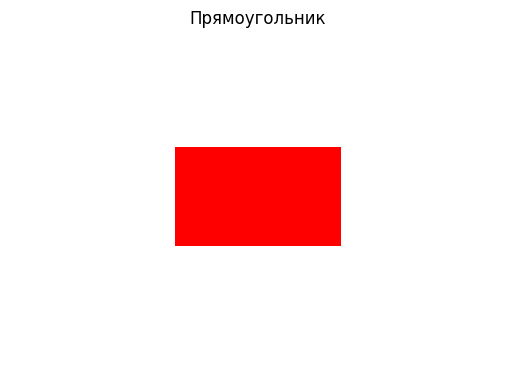

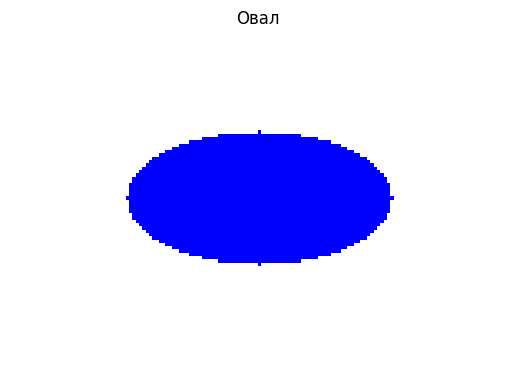

Все тесты прошли успешно!


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(m, n, a, b, bg_color=(255,255,255), rect_color=(0,0,0), position=None):
    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(bg_color, dtype=np.uint8)

    if position is None:
        x0 = (n - a)//2
        y0 = (m - b)//2
    else:
        x0, y0 = position

    x1 = x0 + a
    y1 = y0 + b

    # Ограничиваем координаты изображением
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(n, x1)
    y1 = min(m, y1)

    img[y0:y1, x0:x1, :] = rect_color

    return img


def draw_oval(m, n, a, b, bg_color=(255,255,255), oval_color=(0,0,0), center=None):

    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(bg_color, dtype=np.uint8)

    if center is None:
        x0 = n // 2
        y0 = m // 2
    else:
        x0, y0 = center

    # Создаем координатную сетку
    Y, X = np.ogrid[:m, :n]
    mask = ((X - x0)**2)/(a**2) + ((Y - y0)**2)/(b**2) <= 1

    img[mask] = oval_color

    return img

def test_draw_shapes():
    m, n = 100, 150

    # Прямоугольник
    rect_img = draw_rectangle(m, n, 50, 30, bg_color=(255,255,255), rect_color=(255,0,0))
    assert rect_img.shape == (m, n, 3)
    assert np.any(rect_img[:, :, 0] == 255)  # красный канал присутствует

    plt.imshow(rect_img)
    plt.title("Прямоугольник")
    plt.axis('off')
    plt.show()

    # Овал
    oval_img = draw_oval(m, n, 40, 20, bg_color=(255,255,255), oval_color=(0,0,255))
    assert oval_img.shape == (m, n, 3)
    assert np.any(oval_img[:, :, 2] == 255)  # синий канал присутствует

    plt.imshow(oval_img)
    plt.title("Овал")
    plt.axis('off')
    plt.show()

    print("Все тесты прошли успешно!")

test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
import numpy as np

def analyze_time_series(series, p=3):
    series = np.array(series)
    
    # Математическое ожидание, дисперсия, СКО
    mean = series.mean()
    var = series.var()
    std = series.std()
    
    # Локальные максимумы и минимумы
    local_max = []
    local_min = []
    n = len(series)
    for i in range(n):
        if i == 0:
            # крайний левый элемент
            if series[i] > series[i+1]:
                local_max.append(i)
            elif series[i] < series[i+1]:
                local_min.append(i)
        elif i == n-1:
            # крайний правый элемент
            if series[i] > series[i-1]:
                local_max.append(i)
            elif series[i] < series[i-1]:
                local_min.append(i)
        else:
            if series[i] > series[i-1] and series[i] > series[i+1]:
                local_max.append(i)
            elif series[i] < series[i-1] and series[i] < series[i+1]:
                local_min.append(i)
    
    # Скользящее среднее
    if p > n:
        moving_avg = np.array([])
    else:
        moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    
    return {
        'mean': mean,
        'var': var,
        'std': std,
        'local_max': local_max,
        'local_min': local_min,
        'moving_avg': moving_avg
    }

ts = [1, 3, 2, 5, 4, 6, 2, 3, 1, 4]

result = analyze_time_series(ts, p=3)

print("Математическое ожидание:", result['mean'])
print("Дисперсия:", result['var'])
print("СКО:", result['std'])
print("Индексы локальных максимумов:", result['local_max'])
print("Индексы локальных минимумов:", result['local_min'])
print("Скользящее среднее:", result['moving_avg'])

Математическое ожидание: 3.1
Дисперсия: 2.4899999999999998
СКО: 1.57797338380595
Индексы локальных максимумов: [1, 3, 5, 7, 9]
Индексы локальных минимумов: [0, 2, 4, 6, 8]
Скользящее среднее: [2.         3.33333333 3.66666667 5.         4.         3.66666667
 2.         2.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
import numpy as np

def one_hot_encode(labels):

    labels = np.array(labels, dtype=int)
    n_classes = labels.max() + 1
    one_hot = np.zeros((labels.size, n_classes), dtype=int)
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

def test_one_hot_encode():

    labels = [0, 2, 3, 0]
    result = one_hot_encode(labels)
    expected = np.array([
        [1,0,0,0],
        [0,0,1,0],
        [0,0,0,1],
        [1,0,0,0]
    ])
    assert np.array_equal(result, expected), f"Test failed: {result} != {expected}"

    # Тест с одной меткой
    labels = [1,1,1]
    result = one_hot_encode(labels)
    expected = np.array([
        [0,1],
        [0,1],
        [0,1]
    ])
    assert np.array_equal(result, expected)

    # Тест с метками 0..2
    labels = [0,1,2]
    result = one_hot_encode(labels)
    expected = np.eye(3, dtype=int)
    assert np.array_equal(result, expected)

    print("Все тесты прошли успешно!")

test_one_hot_encode()

Все тесты прошли успешно!
